# HW05 - Problem 4

Performance evaluation. For each of the 3 datasets, train a decision tree and random forest and report your training and validation accuracies. You should be reporting 12 numbers (3 datasets × 2 classifiers × 2 data splits).


Program overhead:

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [163]:
import numpy as np
import decisiontree as dt
import randomforest as rf
import HW05_utils as ut
from matplotlib import pyplot as plt

Set the base directory for this homework

In [4]:
BASE_DIR = "/Users/mitch/Documents/Cal/2_2017_Spring/COMPSCI 289A - Intro to Machine Learning/HW05/"

Establish a size for the validation set as a fraction of the total training set

In [5]:
valfrac = 0.1

## SPAM
-----------
Calculate decision tree and random forest training/validation accuracies for the spam dataset.

Begin by importing data, shuffling, and separating into training and validation sets.

In [6]:
# Import
SPAM_PATH = "Data/hw5_spam_dist/spam_data.mat"

spam_data = ut.load_data(SPAM_PATH,BASE_DIR,'training_data')
spam_labels = ut.load_data(SPAM_PATH,BASE_DIR,'training_labels').T
spam_test = ut.load_data(SPAM_PATH,BASE_DIR,'test_data')

In [7]:
# Shuffle
spamdata, spamlabels = ut.shuffle_data(spam_data,spam_labels)

In [8]:
# Separate
spamtraindata,spamvaldata = ut.val_partition(spamdata,valfrac)
spamtrainlabels,spamvallabels = ut.val_partition(spamlabels,valfrac)

### Spam Decision Tree

Create and train a decision tree classifier using the spam data and labels.

In [9]:
spam_DTclassifier = dt.DecisionTree(treedepth=100)

In [10]:
spam_DTclassifier.train(spamtraindata,spamtrainlabels)

Calculate the validation accuracy using the trained decision tree

In [11]:
spamDTpredictions = spam_DTclassifier.predict(spamvaldata)

In [12]:
spamDTvalAcc = ut.val_accuracy(spamDTpredictions,spamvallabels) 
print('Validation Accuracy = %.3f%%'%(100*spamDTvalAcc))

Validation Accuracy = 78.608%


Use this procedure to determine the optimal value for the tree depth hyperparameter.

In [232]:
def get_depth_acc(testtype,traindata,trainlabels,valdata,vallabels,treedepth,ntrees=None,mfeatures=None):
    
    # Pick the type of classifier
    if testtype == 'DT':
        classifier = dt.DecisionTree(treedepth)
    elif testtype == 'RF':
        classifier = rf.RandomForest(treedepth,ntrees,mfeatures)
        
    classifier.train(traindata,trainlabels)
    predictions = classifier.predict(valdata)
    valAcc = ut.val_accuracy(predictions,vallabels)
    
    return valAcc

In [244]:
def testdepths(testtype,traindata,trainlabels,valdata,vallabels,maxdepth,depthstep,ntrees=None,mfeatures=None):    
   
    depthAccs = np.empty((int(maxdepth/depthstep),2))
    for depth in range(1,maxdepth+1,depthstep):
        Acc = get_depth_acc(testtype,traindata,trainlabels,valdata,vallabels,depth,ntrees,mfeatures)
        if depthstep > 1:
            depthAccs[int(depth/depthstep)] = np.array([depth,Acc])
        else:
            depthAccs[int(depth/depthstep)-1] = np.array([depth,Acc])

    return depthAccs

In [173]:
def plotdepthAccs(depthAccs,title):
    fig = plt.figure()
    plt.plot(depthAccs[:,0],depthAccs[:,1])
    plt.title(title)
    plt.xlabel('Validation Accuracy')
    plt.ylabel('Tree Depth')
    plt.ylim(0,1)
    plt.show()
    am = np.argmax(depthAccs[:,1])
    print('Max accuracy of %.2f%% for depth of %i' %(100*depthAccs[am,1],depthAccs[am,0]))
    

In [72]:
maxdepth=100
depthstep=3

In [74]:
spamDT_Accs=testdepths('DT',spamtraindata,spamtrainlabels,spamvaldata,spamvallabels,maxdepth,depthstepmaxdepth,depthstep)

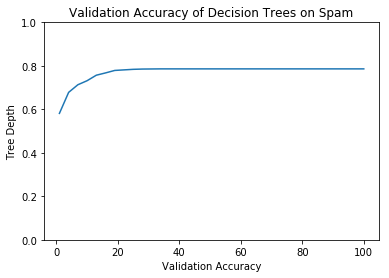

Max accuracy of 78.61% for depth of 34


In [123]:
plotdepthAccs(spamDT_Accs,'Validation Accuracy of Decision Trees on Spam')

Make decision tree predictions for the best depth according to test data, and save to a csv file for upload to Kaggle (0-indexing).

In [79]:
# Retrain the classifier on the best depth
bestdepth = int(spamDT_Accs[np.argmax(spamDT_Accs[:,1]),0])
spam_DTclassifier = dt.DecisionTree(treedepth=bestdepth)
spam_DTclassifier.train(spamdata,spamlabels)

# Use this optimal classifier on the test data
spamDTpredictions = spam_DTclassifier.predict(spam_test)
ids = np.arange(len(spamDTpredictions))
spamDTpredictions_csv = np.concatenate(([ids],[spamDTpredictions]),axis=0).T

In [80]:
np.savetxt(BASE_DIR+'spam_DT_testpredictions.csv',spamDTpredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')

### Spam Random Forest 

Create and train a random forest classifier using the spam data and labels.

In [ ]:
spam_RFclassifier = rf.RandomForest(treedepth=8,ntrees=100)

In [ ]:
spam_RFclassifier.train(spamtraindata,spamtrainlabels)

Calculate the validation accuracy using the trained decision tree.

In [ ]:
spampredictions = spam_RFclassifier.predict(spamvaldata)

In [ ]:
spamvalAcc = ut.val_accuracy(spampredictions,spamvallabels)    
print('Validation Accuracy = %.3f%%'%(100*spamvalAcc))

Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the function looping over depths in spam)

In [ ]:
maxdepth = 50
depthstep = 1

In [ ]:
spamRF_Accs=testdepths('RF',spamtraindata,spamtrainlabels,spamvaldata,spamvallabels,maxdepth,depthstep,ntrees=100)

In [ ]:
plotdepthAccs(spamRF_Accs,'Validation Accuracy of Random Forests on spam data')

In [ ]:
# Retrain the classifier on the best depth
bestdepth = int(spamRF_Accs[np.argmax(spamRF_Accs[:,1]),0])
spam_RFclassifier = rf.RandomForest(treedepth=bestdepth,ntrees=100)
spam_RFclassifier.train(spamdata,spamlabels)

# Use this optimal classifier on the test data
spamRFpredictions = spam_RFclassifier.predict(spam_test)
ids = np.arange(1,len(spamRFpredictions)+1)
spampredictions_csv = np.concatenate(([ids],[spamRFpredictions]),axis=0).T

In [50]:
np.savetxt(BASE_DIR+'spam_testpredictions.csv',spampredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')

## Census
---------------------------
Calculate decision tree and random forest training/validation accuracies for the census dataset.

Begin by importing (preprocessed) data, shuffling, and separating into training and validation sets.

In [81]:
# Import
CENSDAT_PATH = "Data/census_traindata_vec.csv"
CENSLBL_PATH = "Data/census_traindata_lbl.csv"
CENSTST_PATH = "Data/census_testdata_vec.csv"

census_data = np.genfromtxt(BASE_DIR+CENSDAT_PATH,delimiter=',')
census_labels = np.genfromtxt(BASE_DIR+CENSLBL_PATH,delimiter=',')
census_test = np.genfromtxt(BASE_DIR+CENSTST_PATH,delimiter=',')

In [82]:
# Shuffle
census_labels = np.reshape(census_labels,(len(census_labels),1))
censusdata, censuslabels = ut.shuffle_data(census_data,census_labels)

In [83]:
# Separate
censustraindata,censusvaldata = ut.val_partition(censusdata,valfrac)
censustrainlabels,censusvallabels = ut.val_partition(censuslabels,valfrac)

### Census Decision Tree

Create and train a decision tree classifier using the census data and labels

In [84]:
census_DTclassifier = dt.DecisionTree(treedepth=7)

In [85]:
census_DTclassifier.train(censustraindata,censustrainlabels)

Calculate the validation accuracy using the trained decision tree

In [86]:
censuspredictions = census_DTclassifier.predict(censusvaldata)

In [87]:
censusvalAcc = ut.val_accuracy(censuspredictions,censusvallabels)
print('Validation Accuracy = %.3f%%'%(100*censusvalAcc))

Validation Accuracy = 80.960%


Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the functions for finding the optimal depth in spam)

In [88]:
maxdepth = 30
depthstep = 1

In [92]:
censusDT_Accs=testdepths('DT',censustraindata,censustrainlabels,censusvaldata,censusvallabels,maxdepth,depthstep)

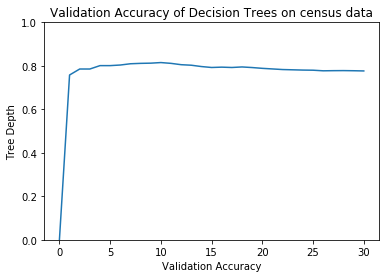

Max accuracy of 81.51% for depth of 10


In [124]:
plotdepthAccs(censusDT_Accs,'Validation Accuracy of Decision Trees on census data')

Make predictions for the test data, and save to a csv file for upload to Kaggle (1-indexing).

In [96]:
# Retrain the classifier on the best depth
bestdepth = int(censusDT_Accs[np.argmax(censusDT_Accs[:,1]),0])
census_DTclassifier = dt.DecisionTree(treedepth=bestdepth)
census_DTclassifier.train(censusdata,censuslabels)

# Use this optimal classifier on the test data
censusDTpredictions = census_DTclassifier.predict(census_test)
ids = np.arange(1,len(censusDTpredictions)+1)
censuspredictions_csv = np.concatenate(([ids],[censusDTpredictions]),axis=0).T

In [39]:
np.savetxt(BASE_DIR+'census_testpredictions.csv',censuspredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')

### Census Random Forest 

Create and train a random forest classifier using the census data and labels.

In [ ]:
census_RFclassifier = rf.RandomForest(treedepth=8,ntrees=100)

In [ ]:
census_RFclassifier.train(censustraindata,censustrainlabels)

Calculate the validation accuracy using the trained decision tree.

In [ ]:
censuspredictions = census_RFclassifier.predict(censusvaldata)

In [ ]:
censusvalAcc = ut.val_accuracy(censuspredictions,censusvallabels)    
print('Validation Accuracy = %.3f%%'%(100*censusvalAcc))

Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the function looping over depths in spam)

In [ ]:
maxdepth = 50
depthstep = 1

In [ ]:
censusRF_Accs=testdepths('RF',censustraindata,censustrainlabels,censusvaldata,censusvallabels,maxdepth,depthstep,ntrees=100)

In [ ]:
plotdepthAccs(censusRF_Accs,'Validation Accuracy of Random Forests on census data')

In [ ]:
# Retrain the classifier on the best depth
bestdepth = int(censusRF_Accs[np.argmax(censusRF_Accs[:,1]),0])
census_RFclassifier = rf.RandomForest(treedepth=bestdepth,ntrees=100)
census_RFclassifier.train(censusdata,censuslabels)

# Use this optimal classifier on the test data
censusRFpredictions = census_RFclassifier.predict(census_test)
ids = np.arange(1,len(censusRFpredictions)+1)
censuspredictions_csv = np.concatenate(([ids],[censusRFpredictions]),axis=0).T

In [50]:
np.savetxt(BASE_DIR+'census_testpredictions.csv',censuspredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')

## Titanic
---------------------------
Calculate decision tree and random forest training/validation accuracies for the Titanic dataset.

Begin by importing (preprocessed) data, shuffling, and separating into training and validation sets.

In [102]:
# Import
TITADAT_PATH = "Data/titanic_traindata_vec.csv"
TITALBL_PATH = "Data/titanic_traindata_lbl.csv"
TITATST_PATH = "Data/titanic_testdata_vec.csv"

titanic_data = np.genfromtxt(BASE_DIR+TITADAT_PATH,delimiter=',')
titanic_labels = np.genfromtxt(BASE_DIR+TITALBL_PATH,delimiter=',')
titanic_test = np.genfromtxt(BASE_DIR+TITATST_PATH,delimiter=',')

In [104]:
# Shuffle
titanic_labels = np.reshape(titanic_labels,(len(titanic_labels),1))
titanicdata, titaniclabels = ut.shuffle_data(titanic_data,titanic_labels)

In [105]:
# Separate
titanictraindata,titanicvaldata = ut.val_partition(titanicdata,valfrac)
titanictrainlabels,titanicvallabels = ut.val_partition(titaniclabels,valfrac)

### Titanic Decision Tree 

Create and train a decision tree classifier using the Titanic data and labels.

In [178]:
titanic_DTclassifier = dt.DecisionTree(treedepth=8)

In [179]:
titanic_DTclassifier.train(titanictraindata,titanictrainlabels)

Calculate the validation accuracy using the trained decision tree

In [180]:
titanicpredictions = titanic_DTclassifier.predict(titanicvaldata)

In [181]:
titanicvalAcc = ut.val_accuracy(titanicpredictions,titanicvallabels)    
print('Validation Accuracy = %.3f%%'%(100*titanicvalAcc))

Validation Accuracy = 70.000%


Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the function looping over depths in spam)

In [119]:
maxdepth = 30
depthstep = 1

In [120]:
titanicDT_Accs=testdepths('DT',titanictraindata,titanictrainlabels,titanicvaldata,titanicvallabels,maxdepth,depthstep)

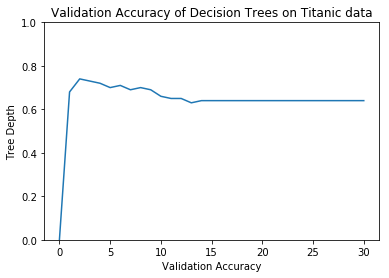

Max accuracy of 74.00% for depth of 2


In [125]:
plotdepthAccs(titanicDT_Accs,'Validation Accuracy of Decision Trees on Titanic data')

In [49]:
# Retrain the classifier on the best depth
bestdepth = int(titanicDT_Accs[np.argmax(titanicDT_Accs[:,1]),0])
titanic_DTclassifier = dt.DecisionTree(treedepth=bestdepth)
titanic_DTclassifier.train(titanicdata,titaniclabels)

# Use this optimal classifier on the test data
titanicDTpredictions = titanic_DTclassifier.predict(titanic_test)
ids = np.arange(1,len(titanicDTpredictions)+1)
titanicpredictions_csv = np.concatenate(([ids],[titanicDTpredictions]),axis=0).T

In [50]:
np.savetxt(BASE_DIR+'titanic_testpredictions.csv',titanicpredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')

### Titanic Random Forest 

Create and train a random forest classifier using the Titanic data and labels.

In [259]:
titanic_RFclassifier = rf.RandomForest(treedepth=8,ntrees=100)

In [260]:
titanic_RFclassifier.train(titanictraindata,titanictrainlabels)

Calculate the validation accuracy using the trained decision tree.

In [261]:
titanicpredictions = titanic_RFclassifier.predict(titanicvaldata)

In [262]:
titanicvalAcc = ut.val_accuracy(titanicpredictions,titanicvallabels)    
print('Validation Accuracy = %.3f%%'%(100*titanicvalAcc))

Validation Accuracy = 77.000%


Use this procedure to determine the optimal value for the tree depth hyperparameter. (Re-use the function looping over depths in spam)

In [263]:
maxdepth = 50
depthstep = 1

In [264]:
titanicRF_Accs=testdepths('RF',titanictraindata,titanictrainlabels,titanicvaldata,titanicvallabels,maxdepth,depthstep,ntrees=100)

In [ ]:
plotdepthAccs(titanicRF_Accs,'Validation Accuracy of Random Forests on Titanic data')

In [266]:
# Retrain the classifier on the best depth
bestdepth = int(titanicRF_Accs[np.argmax(titanicRF_Accs[:,1]),0])
titanic_RFclassifier = rf.RandomForest(treedepth=bestdepth,ntrees=100)
titanic_RFclassifier.train(titanicdata,titaniclabels)

# Use this optimal classifier on the test data
titanicRFpredictions = titanic_RFclassifier.predict(titanic_test)
ids = np.arange(1,len(titanicRFpredictions)+1)
titanicpredictions_csv = np.concatenate(([ids],[titanicRFpredictions]),axis=0).T

In [50]:
np.savetxt(BASE_DIR+'titanic_testpredictions.csv',titanicpredictions_csv,fmt='%i',delimiter=',',header='Id,Category',comments='')